In [27]:
import os 
import numpy as np 
import pandas as pd 
import cv2 
import matplotlib.pyplot as plt 
import random

from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

In [28]:
def add_noise(img):
    '''Add random noise to an image'''
    VARIABILITY = 50
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img = img + noise
    np.clip(img, 0., 255.)
    return img

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.15,
    preprocessing_function=add_noise,
    fill_mode='constant')

## croping images through path

C:\Users\knikh\AppData\Local\Temp\ipykernel_19260\1614325253.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_gray_array = np.array(img_list_gray)
C:\Users\knikh\AppData\Local\Temp\ipykernel_19260\1614325253.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  img_color_array = np.array(img_list_color)


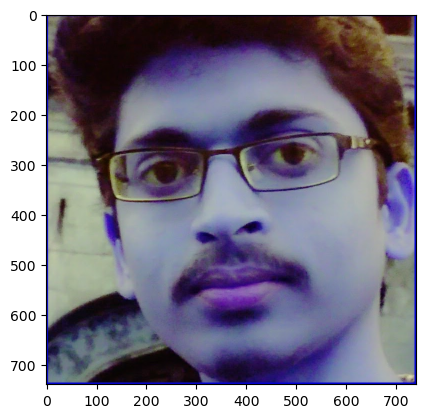

In [142]:
img_path = r'D:\anaconda3\My_Projects\my_work_proj\Face Recognition\Face_image_data\sai'

img_list_gray = []
img_list_color = []

for i in os.listdir(img_path):

    path = img_path +'/'+ i
    img = cv2.imread(path)

    #img = Image.fromarray(img, 'RGB').resize((64, 64))
    img_list_color.append(img)
    
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.array(img_gray)
    img_list_gray.append(img)
    
img_gray_array = np.array(img_list_gray)
img_color_array = np.array(img_list_color)

plt.imshow(img_color_array[0])

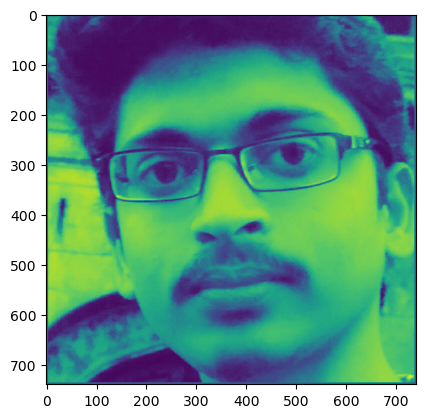

In [145]:
plt.imshow(img_gray_array[0])

In [146]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
  
faces = face_cascade.detectMultiScale(img_gray_array[0], 1.3, 3)

faces

array([[ 67,  67, 583, 583]])

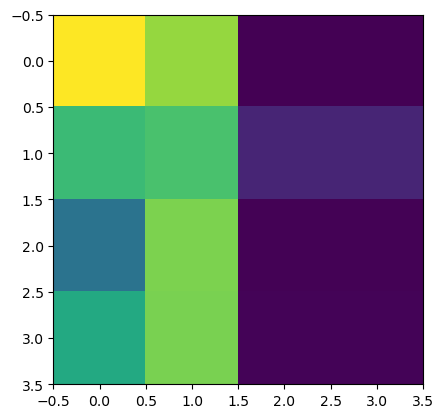

In [47]:
plt.imshow(faces)

In [22]:
faces = face_cascade.detectMultiScale(img_gray_array[0], scaleFactor=1.3,minNeighbors= 4)#scaleFactor=1.1, minNeighbors=
faces

array([[1555, 1455,  383,  383],
       [1977, 2463,   96,   96]])

In [2]:
faces = face_cascade.detectMultiScale(img_gray_array[0], scaleFactor=1.3,minNeighbors= 9)

img_copy = img_color_array[0].copy()
count = 0 
for (x, y, w, h) in faces:
    count +=1
    
    if count <2:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0,0,225), 5)
        face = img_copy[y: y+h, x: x+w]

        face = cv2.resize(face,(112,112))
        img_name =img_path+'/'+'2.jpg'
        cv2.imwrite(img_name,face)
        
        plt.imshow(face[:,:,::-1])
        plt.show()
        
    else:
        break    

NameError: name 'face_cascade' is not defined

In [77]:
cv2.resize(face,(112,112))

(64, 64, 3)

In [78]:
face.shape

(740, 740, 3)

# Data collection for Face detection using webcam

## Making folder to store that persons image

In [3]:
def makefolder():
    name = input(print('Enter Your name'))
    folder_path = 'D:/anaconda3\My_Projects/my_work_proj/Face Recognition/Face_image_data/'+ name
    
    if os.path.exists(folder_path) == False:
        os.makedirs(folder_path)
        print('File Created Sucessfully')
        
    else:
        print('Name is alreday taken, please try adding alphanumeric characters to your name')
        
        user_inp = int(input(print('You still wanna continue? 1 - yes, 0 - No')))
        
        if user_inp == 1: 
            return makefolder()
        
        else:
            return None,0
    
    return name,folder_path

## using webcame to take image of that person

In [30]:
vid = cv2.VideoCapture(0)
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
count = 0 
name,folder_path = makefolder()
print(name)
print(folder_path)
if name != None:

    while True:
        ret,frame=vid.read()
        faces=face_cascade.detectMultiScale(frame,1.3, 5)

        for x,y,w,h in faces:
            cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
            count=count+1

            img_path = folder_path+'/'+ str(count)+".jpg"
            cv2.imwrite(img_path, frame[y:y+h,x:x+w])
            
            cv2.imshow("WindowFrame", frame)
        cv2.waitKey(100)
        
        if count>300:
            break
            
    vid.release()
    cv2.destroyAllWindows()

Enter Your name
Nonen
File Created Sucessfully
n
D:/anaconda3\My_Projects/my_work_proj/Face Recognition/Face_image_data/n


In [7]:
vid.release()
cv2.destroyAllWindows()

In [13]:
# folder_path = img_path + '/' + '1.jpg'
# print(folder_path)

In [31]:
folder_path = folder_path + '/'
print(folder_path)

D:/anaconda3\My_Projects/my_work_proj/Face Recognition/Face_image_data/n/


In [44]:
folder_path = 'D:/anaconda3\\My_Projects/my_work_proj/Face Recognition/Face_image_data/nikhil/'

In [47]:
img_list = []
for i in os.listdir(folder_path):

    img = plt.imread(folder_path+i)
    img = Image.fromarray(img, 'RGB').resize((112,112))
    img_list.append(np.array(img))

img = np.array(img_list)

In [48]:
img.shape

(301, 112, 112, 3)

In [43]:
folder_path = 'D:/anaconda3\\My_Projects/my_work_proj/Face Recognition/Face_image_data/nikhil_augmented/'

In [41]:
os.makedirs('D:/anaconda3\\My_Projects/my_work_proj/Face Recognition/Face_image_data/nikhil_augmented/')

In [140]:
face = face.reshape(1,112,112,3) #[0][:,:,::-1]
face[0] = face[0][:,:,::-1]

In [35]:
i = 0
for batch in datagen.flow(img, batch_size=32,
                          save_to_dir= folder_path ,
                          save_prefix='nikhil',
                          save_format='jpg'):    
    i += 1    
    if i > 3000:        
        break

# datagen.flow(img, batch_size=3000,save_to_dir= r'D:\anaconda3\My_Projects\my_work_proj\Face Recognition\Face_image_data\nikhil' ,
#              save_prefix='nikhil',save_format='jpg')

In [38]:
len(os.listdir('D:/anaconda3\\My_Projects/my_work_proj/Face Recognition/Face_image_data/n/'))

89255